# import library

In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Mengubah dataset menjadi dataframe (tabel)

In [5]:
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Kolom Id tidak berhubungan dengan label, maka buang kolom dari dataframe menggunakna fungsi drop()

In [6]:
df = df.drop(columns='Id')

- Mengubah nilai pada kolom **species** karena tipe string tidak bisa diproses oleh model neural network.
- One hot encoding menggunakan fungsi **get_dummies()**

In [7]:
category = pd.get_dummies(df.Species, dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


menggabungkan kolom hasil one hot encoding dan membuang kolom spesies

In [8]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


konversi dataframe menjadi numpy array agar bisa diproses neural network

In [9]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]], shape=(150, 7))

#### memisahkan atribut label agar model bisa mempelajari pola data dan hubungannya
- **variablel independen:** SepalLengthCm, SepalWidthCm, PetalLengthCm, dan PetalWidthCm
- **variabel dependen:** Iris-setosa, Iris-versicolor, dan Iris-virginica

In [10]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

# normalisasi data

In [11]:
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

# Pembagian dataset dan data uji

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

# Arsitektur model
- **Layer:** 3
- **Activation function**: softmax (karena umum dipakai untuk klasifikasi multi kelas)

In [13]:
model = Sequential([  
          Dense(64, activation='relu', input_shape=(4,)),  
          Dense(64, activation='relu'), 
          Dense(3, activation='softmax')])

d:\PIJAK\DEEP LEARNING\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Menentukan optimizer dan loss function

optimizer adalah implementasi spesifik dari algoritma penurunan gradien, menggunakan loss ‘categorical_crossentropy’.

In [14]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

menggunakan hist untuk membuat plot

In [15]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2762 - loss: 1.0838
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3429 - loss: 1.0488 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6571 - loss: 1.0193 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6857 - loss: 0.9899 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6952 - loss: 0.9637
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6952 - loss: 0.9354 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6952 - loss: 0.9068 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6952 - loss: 0.8787 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6952 - loss: 0.8488 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6952 - loss: 0.8181 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6952 - loss: 0.7877 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6952 - los

# menguji model

In [16]:
model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9556 - loss: 0.0899


[0.0899038091301918, 0.9555555582046509]

In [17]:
import matplotlib.pyplot as plt

# membuat sebuah plot dari objek history. 

Objek history menampung informasi mengenai akurasi dan loss model pada setiap epoch selama proses pelatihan dalam bentuk dictionary, sehingga kita dapat membuat plot akurasi atau loss.

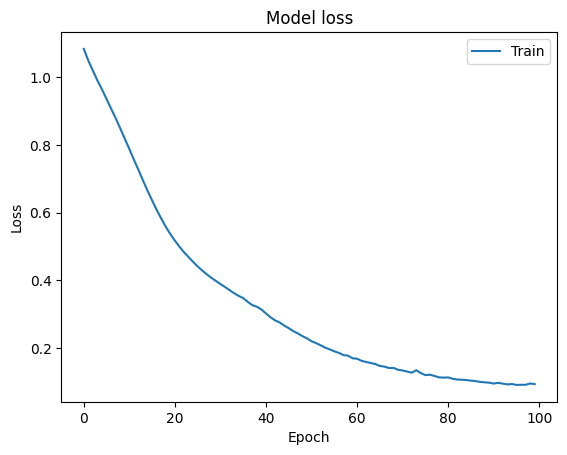

In [18]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

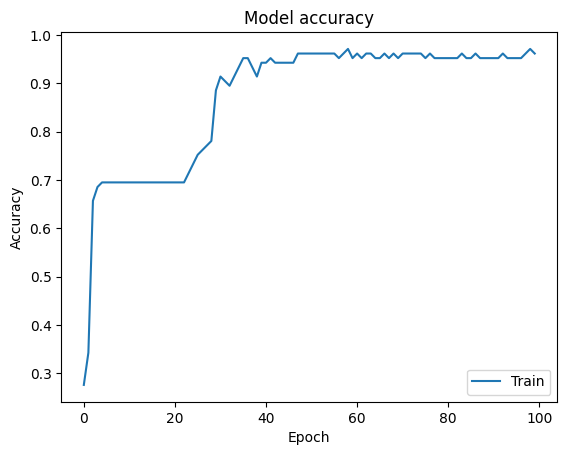

In [19]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# callbacks untuk menghetikan epoch
- buat sebuah kelas bernama **myCallback()**. Parameter pertama pada kelas callbacks di atas harus memiliki sifat inherit **tf.keras.callbacks.Callback**. 
- buat fungsi yang paling penting yaitu **on_epoch_end()**. Fungsi inilah yang akan berperan untuk memberi tahu model agar berhenti melakukan pelatihan ketika telah mencapai target.
- Kode **if(logs.get(‘accuracy’)>0.9)** memiliki arti “jika akurasi lebih besar dari 0.9, maka eksekusi perintah berikutnya”.
- Kode **self.model.stop_training = True** adalah kode yang memberi tahu model untuk menghentikan pelatihan.


In [21]:
class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
  if(logs.get('accuracy')>0.9):
   print("\nAkurasi telah mencapai >90%!")
   self.model.stop_training = True
callbacks = myCallback()

In [22]:
hist = model.fit(X_train, Y_train, epochs=100, callbacks = [callbacks])

Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0399
Akurasi telah mencapai >90%!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9524 - loss: 0.0916
